In [ ]:
import Scripts.simulate_p_circuit as simulate_p_circuit
import Scripts.CustomScripts as CS

J, h, node_order = CS.load_npz_data("4bIntFac.npz", target_folder="Circuit_Library")

# Define your target_names dictionary
target_names = {
    "Floating State": {
        "Buffer1": "push0",  
        "Cin0": "push0",
        "Cin1": "push0",
        "Cin2": "push0",
    },
    "1x15": {
        "Buffer1": "push0",  
        "Cin0": "push0",
        "Cin1": "push0",
        "Cin2": "push0",
        "A0": "push1",
        "A1": "push0",
        "A2": "push0",
        "A3": "push0",
        "B0": "push1",
        "B1": "push1",
        "B2": "push1",
        "B3": "push1",
    },
        "15x15": {
        "Buffer1": "push0",  
        "Cin0": "push0",
        "Cin1": "push0",
        "Cin2": "push0",
        "A0": "push1",
        "A1": "push1",
        "A2": "push1",
        "A3": "push1",
        "B0": "push1",
        "B1": "push1",
        "B2": "push1",
        "B3": "push1",
    },
        "15x15": {
        "Buffer1": "push0",  
        "Cin0": "push0",
        "Cin1": "push0",
        "Cin2": "push0",
        "A0": "push1",
        "A1": "push1",
        "A2": "push1",
        "A3": "push1",
        "B0": "push1",
        "B1": "push1",
        "B2": "push1",
        "B3": "push1",
    },
        "Factor 14": {
        "Buffer1": "push0",  
        "Cin0": "push0",
        "Cin1": "push0",
        "Cin2": "push0",
        "P0": "push0",
        "P1": "push1",
        "P2": "push1",
        "P3": "push1",
        "P4": "push0",
        "P5": "push0",
        "P6": "push0",
        "P7": "push0",
    }
}

# Get the updated configurations:
configured_h = CS.update_all_configurations(target_names, h, node_order)

selected_bits = {
    "Floating State": ["P7","P6","P5","P4","P3","P2","P1","P0"],  
    "1x15": ["P7","P6","P5","P4","P3","P2","P1","P0"],  
    "15x15": ["P7","P6","P5","P4","P3","P2","P1","P0"], 
    # "Factor 14": [3, 2, 1, 0, 7, 6, 5, 4], 
}
simulate_p_circuit.plot_probabilities(num_steps=100000, savefig=True, save_csv=False,J_bipolar=J, node_order=node_order,
                                      h_bipolar_dict=configured_h, use_python=True, use_boltzmann=False, 
                                      filename="Integer_Factorization", figWidth=68, selected_bits=selected_bits)

Found folder: C:\Users\thoma\OneDrive - Aarhus Universitet\Probabilistic Computing\Python Codes\Circuit_Library
Processing case: Floating State (h_bipolar = [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -16.0, -16.0, -16.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.0, -2.0, -2.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.0, -2.0, -2.0, -2.0, 0.0, 0.0, 0.0, -16.0]) with selected bits [18, 17, 16, 15, 14, 13, 12, 11]


In [ ]:
import numpy as np
node_names = np.array(["A0", "A1", "A2", "A3", "B0", "B1", "B2", "B3", "Cin0", "Cin1", "Cin2", 
                       "P0", "P1", "P2", "P3", "P4", "P5", "P6", "P7", "4bFA1_A3", "4bFA1_A2", 
                       "4bFA1_A1", "4bFA1_A0", "4bFA1_B3", "4bFA1_B2", "4bFA1_B1", "4bFA1_B0", 
                       "4bFA1_Cout", "4bFA1_C2", "4bFA1_C1", "4bFA1_C0", "4bFA1_S3", "4bFA1_S2", 
                       "4bFA1_S1", "4bFA2_B3", "4bFA2_B2", "4bFA2_B1", "4bFA2_B0", "4bFA2_Cout", 
                       "4bFA2_C2", "4bFA2_C1", "4bFA2_C0", "4bFA2_S3", "4bFA2_S2", "4bFA2_S1", 
                       "4bFA3_B3", "4bFA3_B2", "4bFA3_B1", "4bFA3_B0", "4bFA3_C2", "4bFA3_C1", "4bFA3_C0", "Buffer1"])

target_names = ["P0", "P1", "P2", "P3", "P4", "P5", "P6", "P7"]
indices = [int(np.where(node_names == name)[0][0]) for name in target_names]
print(", ".join(map(str, indices)))

11, 12, 13, 14, 15, 16, 17, 18


256


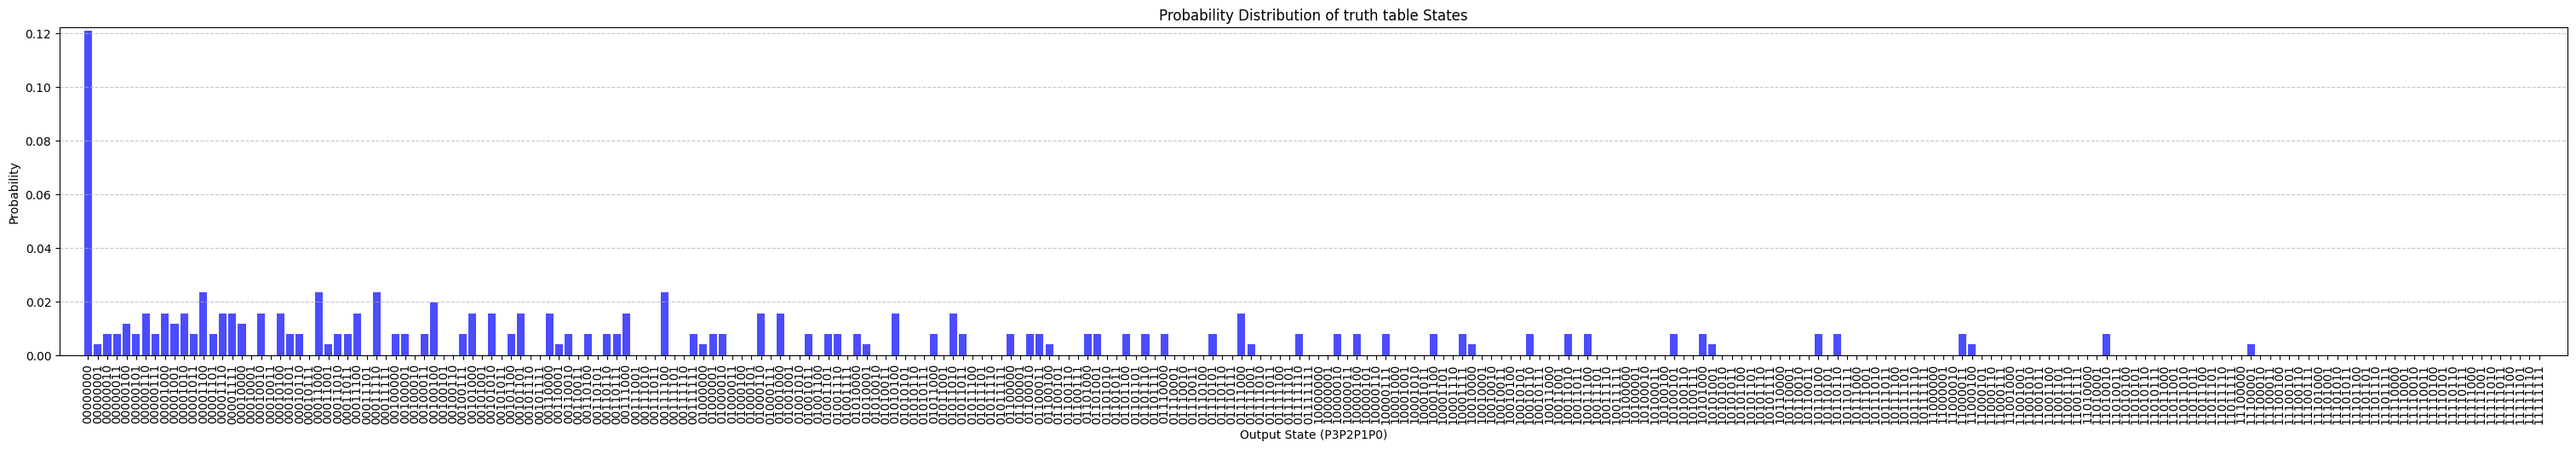

In [ ]:
import numpy as np
import Scripts.CustomScripts as CS
def int_to_bits(n, width):
    """Convert integer n into a list of bits of given width (MSB first)."""
    return [(n >> i) & 1 for i in reversed(range(width))]

truth_table = []
# Iterate over all 4-bit numbers for A and B.
for A in range(16):
    for B in range(16):
        A_bits = int_to_bits(A, 4)  # 4 bits for A
        B_bits = int_to_bits(B, 4)  # 4 bits for B
        product = A * B
        # print(A,B,product)
        P_bits = int_to_bits(product, 8)  # 8 bits for the product
        truth_table.append(A_bits + B_bits + P_bits)

truth_table = np.array(truth_table)
print(len(truth_table))
columns = ["A3", "A2", "A1", "A0", "B3", "B2", "B1", "B0", "P7", "P6", "P5", "P4", "P3", "P2", "P1", "P0"]

output_columns = [ "P7", "P6", "P5", "P4", "P3", "P2", "P1", "P0"]
CS.truth_table_probabilities(truth_table,columns,output_columns,figWidth=38)

Found folder: C:\Users\thoma\OneDrive - Aarhus Universitet\Probabilistic Computing\Python Codes\Circuit_Library
['A0' 'A1' 'A2' 'A3' 'B0' 'B1' 'B2' 'B3' 'Cin0' 'Cin1' 'Cin2' 'P0' 'P1'
 'P2' 'P3' 'P4' 'P5' 'P6' 'P7' '4bFA1_A3' '4bFA1_A2' '4bFA1_A1' '4bFA1_A0'
 '4bFA1_B3' '4bFA1_B2' '4bFA1_B1' '4bFA1_B0' '4bFA1_Cout' '4bFA1_C2'
 '4bFA1_C1' '4bFA1_C0' '4bFA1_S3' '4bFA1_S2' '4bFA1_S1' '4bFA2_B3'
 '4bFA2_B2' '4bFA2_B1' '4bFA2_B0' '4bFA2_Cout' '4bFA2_C2' '4bFA2_C1'
 '4bFA2_C0' '4bFA2_S3' '4bFA2_S2' '4bFA2_S1' '4bFA1_AUX00' '4bFA1_AUX01'
 '4bFA1_AUX02' '4bFA1_AUX03' '4bFA1_AUX04' '4bFA1_AUX05' '4bFA1_AUX06'
 '4bFA1_AUX07' '4bFA1_HB1' '4bFA1_AUX10' '4bFA1_AUX11' '4bFA1_AUX12'
 '4bFA1_AUX13' '4bFA1_AUX14' '4bFA1_AUX15' '4bFA1_AUX16' '4bFA1_AUX17'
 '4bFA1_HB2' '4bFA1_AUX20' '4bFA1_AUX21' '4bFA1_AUX22' '4bFA1_AUX23'
 '4bFA1_AUX24' '4bFA1_AUX25' '4bFA1_AUX26' '4bFA1_AUX27' '4bFA1_HB3'
 '4bFA1_AUX30' '4bFA1_AUX31' '4bFA1_AUX32' '4bFA1_AUX33' '4bFA1_AUX34'
 '4bFA1_AUX35' '4bFA1_AUX36' '4bFA1_AUX37' 

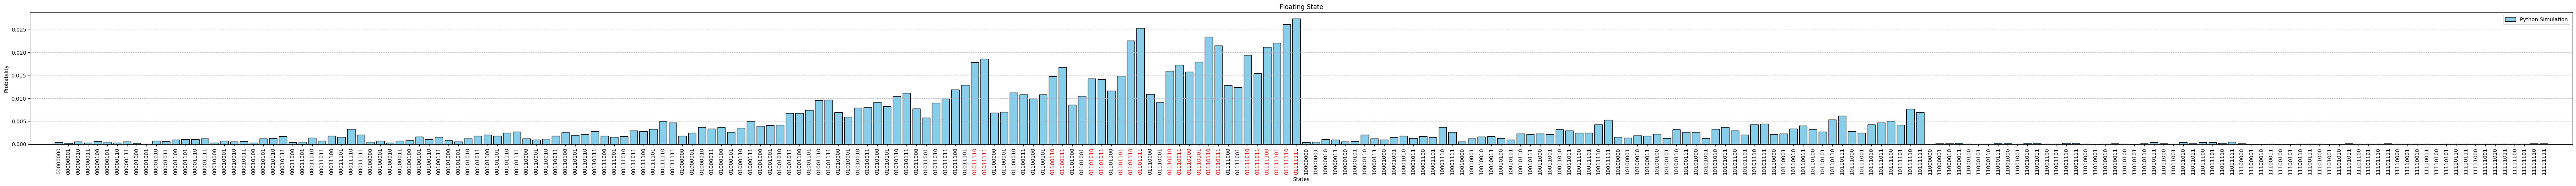

Processing case: 1x15 (h_bipolar = [15.875, -16.0, -16.0, -16.0, 15.875, 15.875, 15.875, 15.875, -16.0, -16.0, -16.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.0, -2.0, -2.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.0, -2.0, -2.0, -2.0, 0.0, 0.0, 0.0, -16.0]) with selected bits [18, 17, 16, 15, 14, 13, 12, 11]
Saved plot: Plots/Large_Integer_Factorization_1x15.png


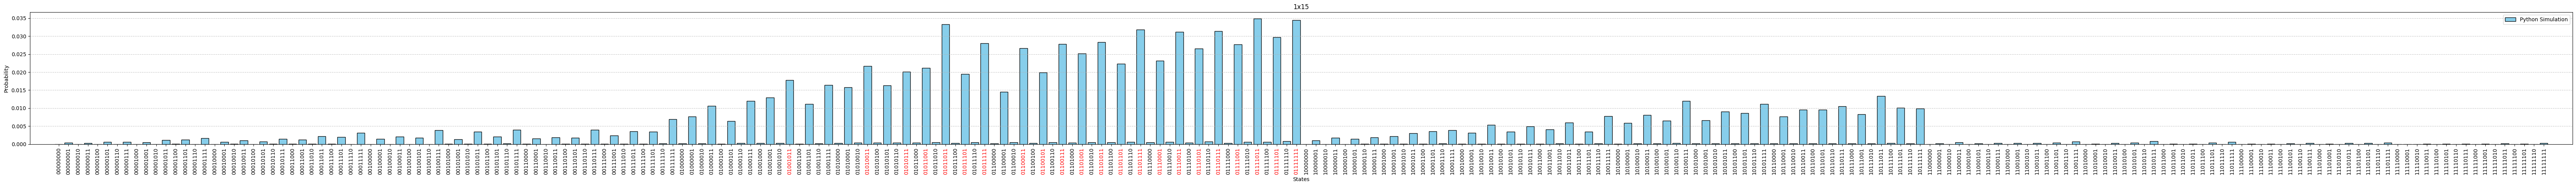

Processing case: 15x15 (h_bipolar = [15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, 15.875, -16.0, -16.0, -16.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.0, -2.0, -2.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.0, -2.0, -2.0, -2.0, 0.0, 0.0, 0.0, -16.0]) with selected bits [18, 17, 16, 15, 14, 13, 12, 11]
Saved plot: Plots/Large_Integer_Factorization_15x15.png


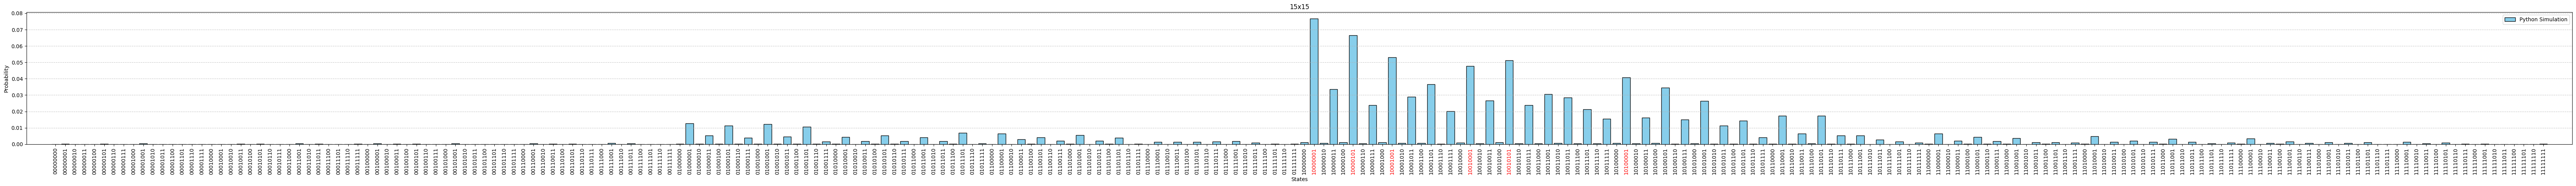

Processing case: Factor 14 (h_bipolar = [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -16.0, -16.0, -16.0, -16.0, 15.875, 15.875, 15.875, -16.0, -16.0, -16.0, -16.0, 0.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.0, -2.0, -2.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.0, -2.0, -2.0, -2.0, 0.0, 0.0, 0.0, -16.0]) with selected bits [3, 2, 1, 0, 7, 6, 5, 4]
Saved plot: Plots/Large_Integer_Factorization_Factor_14.png


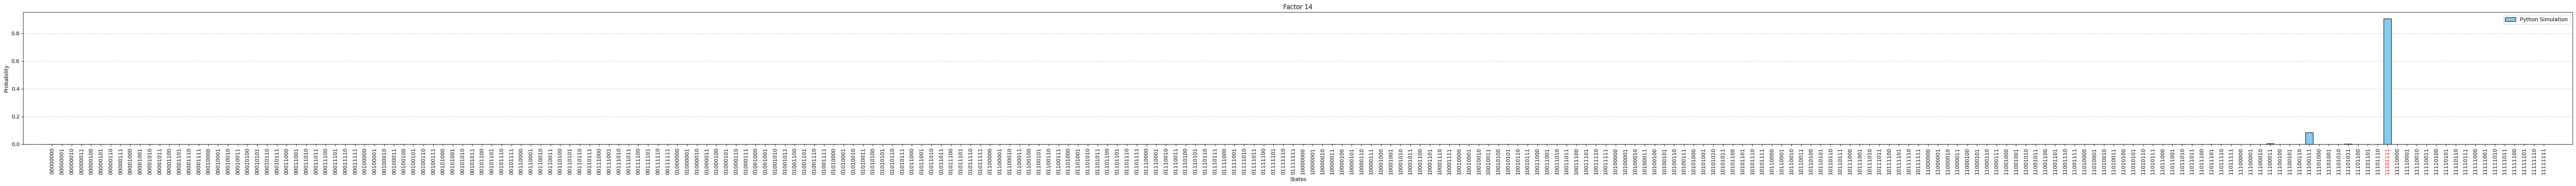

In [1]:
import Scripts.simulate_p_circuit as simulate_p_circuit
import Scripts.CustomScripts as CS

J, h, node_order = CS.load_npz_data("Large_4bIntFac.npz", target_folder="Circuit_Library")
print(node_order)
# Define your target_names dictionary
target_names = {
    "Floating State": {
        "Buffer1": "push0",  
        "Cin0": "push0",
        "Cin1": "push0",
        "Cin2": "push0",
    },
    "1x15": {
        "Buffer1": "push0",  
        "Cin0": "push0",
        "Cin1": "push0",
        "Cin2": "push0",
        "A0": "push1",
        "A1": "push0",
        "A2": "push0",
        "A3": "push0",
        "B0": "push1",
        "B1": "push1",
        "B2": "push1",
        "B3": "push1",
    },
        "15x15": {
        "Buffer1": "push0",  
        "Cin0": "push0",
        "Cin1": "push0",
        "Cin2": "push0",
        "A0": "push1",
        "A1": "push1",
        "A2": "push1",
        "A3": "push1",
        "B0": "push1",
        "B1": "push1",
        "B2": "push1",
        "B3": "push1",
    },
        "Factor 14": {
        "Buffer1": "push0",  
        "Cin0": "push0",
        "Cin1": "push0",
        "Cin2": "push0",
        "P0": "push0",
        "P1": "push1",
        "P2": "push1",
        "P3": "push1",
        "P4": "push0",
        "P5": "push0",
        "P6": "push0",
        "P7": "push0",
    }
}

# Get the updated configurations:
configured_h = CS.update_all_configurations(target_names, h, node_order)

selected_bits = {
    "Floating State": ["P7","P6","P5","P4","P3","P2","P1","P0"],  
    "1x15": ["P7","P6","P5","P4","P3","P2","P1","P0"],  
    "15x15": ["P7","P6","P5","P4","P3","P2","P1","P0"], 
    "Factor 14": ["A3", "A2", "A1", "A0", "B3", "B2", "B1", "B0"], 
}
simulate_p_circuit.plot_probabilities(num_steps=100000, savefig=True, save_csv=False,J_bipolar=J, node_order=node_order,
                                      h_bipolar_dict=configured_h, use_python=True, use_boltzmann=False, 
                                      filename="Large_Integer_Factorization", figWidth=68, selected_bits=selected_bits)